In [1]:
# https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data?select=GCP-Coupons-Instructions.rtf

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train_df.shape

(55423856, 8)

In [5]:
train_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [6]:
import mpu

In [7]:
df_check = train_df.head(10)
df_check

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [8]:
df_check["distance"] = df_check.apply(lambda row : mpu.haversine_distance((row.pickup_latitude, row.pickup_longitude), (row.dropoff_latitude, row.dropoff_longitude)), axis=1)

/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_check.distance

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: distance, dtype: float64

In [14]:
!pip install osmnx

  Using cached osmnx-0.15.1-py2.py3-none-any.whl (84 kB)
     |████████████████████████████████| 1.8 MB 1.9 MB/s eta 0:00:01
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
     |████████████████████████████████| 12.4 MB 6.1 MB/s eta 0:00:01
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Using cached Rtree-0.9.4.tar.gz (62 kB)
    ERROR: Command errored out with exit status 1:
     command: /home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qq8568td/Rtree/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qq8568td/Rtree/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-install-qq8568td/Rtree/pip-egg-info
         cwd: /tmp/pip-install-qq8568td/Rtree/
    Complete output (15 lines):
    Traceback (most recent call last):

In [15]:
# Try cal
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [61]:
portion_df = train_df[:10000]

In [62]:
portion_df.shape

(10000, 8)

In [63]:
portion_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
9995,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2
9998,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00 UTC,-73.992548,40.735652,-73.998802,40.723085,1


In [64]:
portion_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [65]:
portion_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [66]:
# Drop the key, and take fare amount in another array
portion_df_y = portion_df.fare_amount
# portion_df.drop(['key', 'fare_amount'], axis=1, inplace=True)
portion_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
9995,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2
9998,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00 UTC,-73.992548,40.735652,-73.998802,40.723085,1


In [73]:
from datetime import datetime

portion_df['month'] = portion_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').month)
portion_df['year'] = portion_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').year)
portion_df['date'] = portion_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').day)
portion_df['day_of_week'] = portion_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').weekday())
portion_df['hour'] = portion_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').hour)
portion_df['minutes'] = portion_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').minute)
#     print(datetime.strptime(row[:-4], '%Y-%m-%d %H:%M:%S').month)
portion_df

/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environments/ml_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/local/SIRIONLABS/anshuman.tiwari1/virtual_environmen

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day_of_week,hour,minutes
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,15,0,17,26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,5,1,16,52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,18,3,0,35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,21,5,4,30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,9,1,7,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2,10,2011,26,2,10,44
9996,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1,12,2011,16,4,15,37
9997,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2,11,2013,16,5,22,47
9998,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00 UTC,-73.992548,40.735652,-73.998802,40.723085,1,1,2010,28,3,11,38


In [68]:
portion_df.hour.unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5])

In [69]:
import matplotlib.pyplot as plt

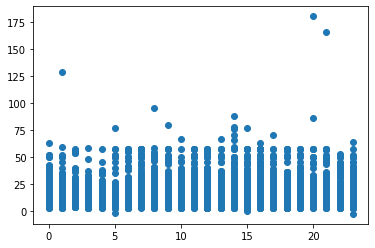

In [71]:
plt.scatter(x = portion_df.hour, y= portion_df.fare_amount)

In [72]:
train_df['hour'] = train_df.pickup_datetime.apply(lambda x : datetime.strptime(x[:-4], '%Y-%m-%d %H:%M:%S').hour)

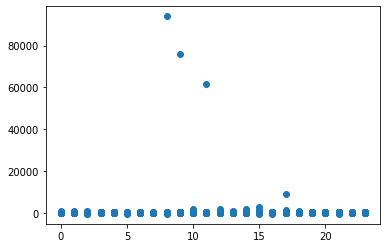

In [74]:
plt.scatter(x = train_df.hour, y = train_df.fare_amount)